

## Assignement execution:

In [13]:
import math
import zipfile
from PIL import Image, ImageOps, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [2]:
#define a parsed source to work on:
parsed_img_src = {}  

In [3]:
#iterate through the zip file and save all the binarized versions to parsed_img_src
with zipfile.ZipFile('readonly/images.zip', 'r') as archive:
    for entry in archive.infolist():
        with archive.open(entry) as file:
            img = Image.open(file).convert('RGB')
            parsed_img_src[entry.filename] = {'pil_img':img}

In [5]:
#parse all images text
for img_name in parsed_img_src.keys():
    text = pytesseract.image_to_string(parsed_img_src[img_name]['pil_img'])
    parsed_img_src[img_name]['text'] = text

In [18]:
#find the bounding boxes for all the faces from every page and extract them
for img_name in parsed_img_src.keys():
    open_cv_image = np.array(parsed_img_src[img_name]['pil_img']) 
    img_g = cv.cvtColor(open_cv_image, cv.COLOR_BGR2GRAY)
    faces_bounding_boxes = face_cascade.detectMultiScale(img_g, 1.3, 5)
    parsed_img_src[img_name]['faces'] = []
    for x,y,w,h in faces_bounding_boxes:
        face = parsed_img_src[img_name]['pil_img'].crop((x,y,x+w,y+h))
        parsed_img_src[img_name]['faces'].append(face)

In [19]:
#create thumbnails
for img_name in parsed_img_src.keys():
    for face in parsed_img_src[img_name]['faces']:
        face.thumbnail((100,100),Image.ANTIALIAS)

In [32]:
#search the keyword in every page's text and return the faces
def search(keyword):
    for img_name in parsed_img_src:
        if (keyword in parsed_img_src[img_name]['text']):
            if(len(parsed_img_src[img_name]['faces']) != 0):
                print("Result found in file {}".format(img_name))
                h = math.ceil(len(parsed_img_src[img_name]['faces'])/5)
                contact_sheet=Image.new('RGB',(500, 100*h))
                xc = 0
                yc = 0
                for img in parsed_img_src[img_name]['faces']:
                    contact_sheet.paste(img, (xc, yc))
                    if xc + 100 == contact_sheet.width:
                        xc = 0
                        yc += 100
                    else:
                        xc += 100
                        
                display(contact_sheet)
            else:
                print("Result found in file {} \nBut there were no faces in that file\n\n".format(img_name))
    return          

Result found in file a-0.png


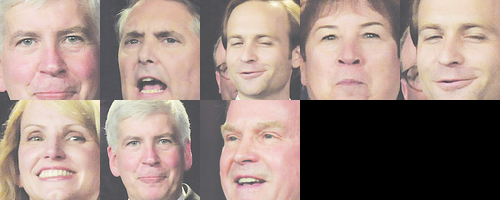

Result found in file a-3.png


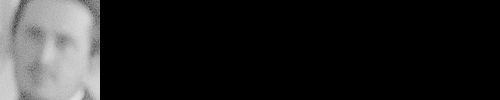

In [33]:
search('Christopher')

Result found in file a-0.png


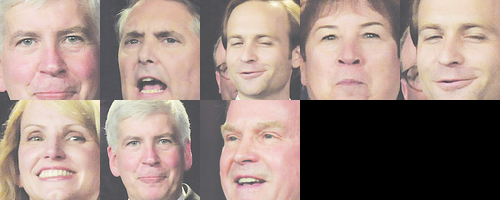

Result found in file a-1.png


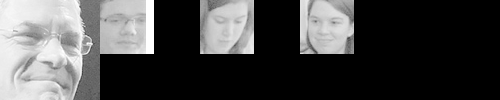

Result found in file a-10.png 
But there were no faces in that file


Result found in file a-13.png


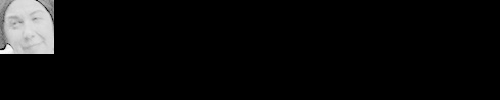

Result found in file a-2.png


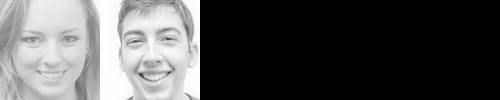

Result found in file a-3.png


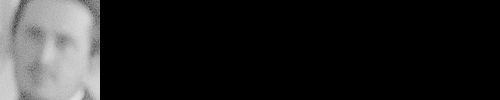

Result found in file a-8.png 
But there were no faces in that file




In [34]:
search('Mark')

Result found in file a-2.png


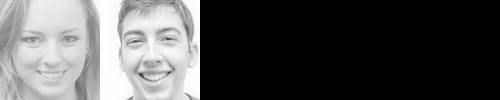

In [31]:
search('pizza')